In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

In [2]:
import numpy as np 
from qiskit import QuantumCircuit, QuantumRegister , ClassicalRegister, execute , BasicAer, IBMQ
from qiskit.visualization import plot_histogram , plot_bloch_multivector 

In [3]:
qregister = QuantumRegister (3) # Protocol uses 3 qubits , 2 classical bits in 2 different registers. 
crz = ClassicalRegister(1)
crx = ClassicalRegister(1)
teleportation_circuit = QuantumCircuit(qregister, crz, crx)

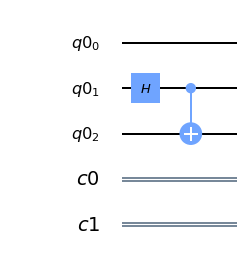

In [4]:
# Step 1: Eve creates an entanged pair of qubits a and b 
def create_bell_pair(qc, a, b):
    """   Creates a bell pair in qc using Qubits a and b  """ 
    qc.h(a) # put Qubit a into state |+> 
    qc.cx(a,b) # CNOT with a as control and b as target
    # Eve entangles qubits q1 and q2 , Lets apply this to our circuit

create_bell_pair(teleportation_circuit, 1, 2)
# View the circuit so far. 
teleportation_circuit.draw()

In [5]:
# Alice owns q1 and Bob owns q2

In [6]:
# Step 2:
def alice_gates(qc, psi, a):
    qc.cx(psi,a)
    qc.h(psi)

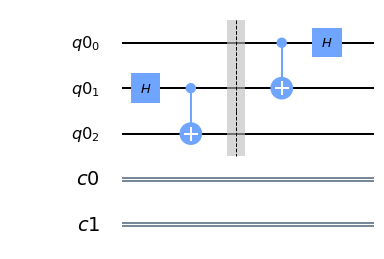

In [7]:
# Let's apply this to circuit
teleportation_circuit.barrier()
alice_gates(teleportation_circuit,0,1)
teleportation_circuit.draw()

In [8]:
def measure_and_send(qc,a,b):
    """ Measures the qubits a and b and sends these results to Bob """
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)

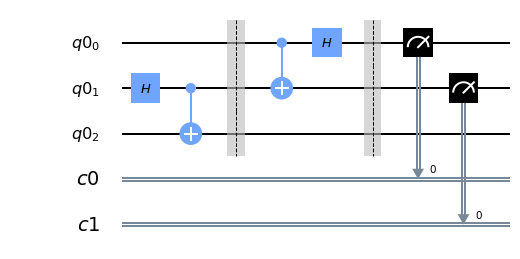

In [9]:
measure_and_send(teleportation_circuit,0,1)
teleportation_circuit.draw()

In [10]:
def bob_gates(qc,qubit, crz, crx):
    qc.z(qubit).c_if(crz,1)
    qc.z(qubit).c_if(crx,1)
    

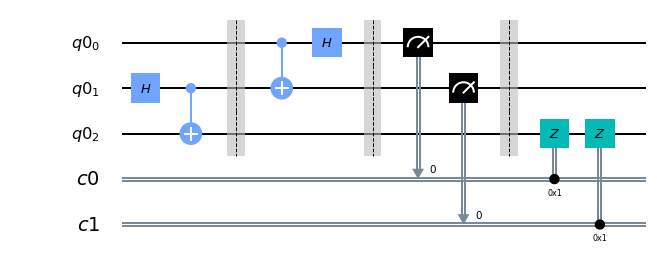

In [11]:
#Let's apply this to our circuit 
teleportation_circuit.barrier()
bob_gates(teleportation_circuit, 2, crz, crx)
teleportation_circuit.draw()


$$ |\psi\rangle =\begin{bmatrix}
0.49939+0.73093j \\
0.15312-0.43921j\end{bmatrix} $$

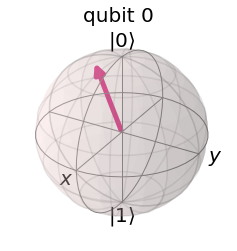

In [12]:
from qiskit_textbook.tools import random_state, vector2latex
# create random 1-qubit  state 
psi = random_state(1)
# Display it nicely 
vector2latex(psi , pretext="|\\psi\\rangle =")
## Show it on a Bloch sphere
plot_bloch_multivector(psi)


In [13]:
from qiskit.extensions import Initialize
init_gate = Initialize(psi)

In [14]:
 # Using the Statevector Simulator 
# We can use the state vector simulator to verify our qubit has been teleported

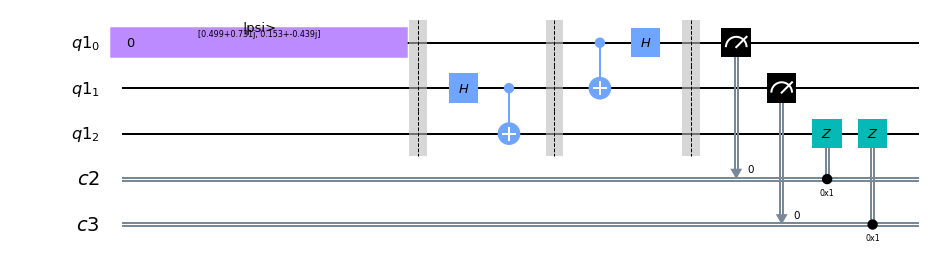

In [15]:
qr = QuantumRegister(3)
crz = ClassicalRegister(1)
crx = ClassicalRegister(1)
qc = QuantumCircuit(qr,crz, crx)
# First let's intialize Alice's q0 
qc.append(init_gate, [0])
qc.barrier()
# Now begins the teleportation protocol 
create_bell_pair(qc,1,2)
qc.barrier()
# send q1 to Alice and q2 to Bob 
alice_gates(qc,0,1)
# Alice then send Qubit to Bob
measure_and_send(qc,0,1)
# Bob Decodes qubits sent by Alice
bob_gates(qc, 2, crz, crx )
qc.draw()

You can run this cell a few times to make sure. You may notice that the qubits 0 & 1 change states, but qubit 2 is always in the state  |𝜓⟩ .



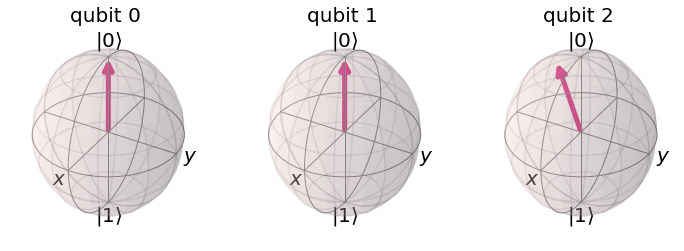

In [16]:
backend = BasicAer.get_backend('statevector_simulator')
out_vector = execute(qc, backend).result().get_statevector()
plot_bloch_multivector(out_vector)

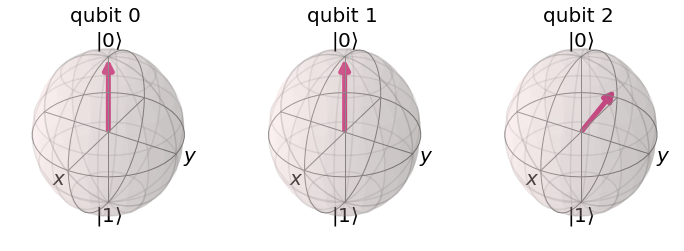

In [18]:
backend = BasicAer.get_backend('statevector_simulator')
out_vector = execute(qc, backend).result().get_statevector()
plot_bloch_multivector(out_vector)

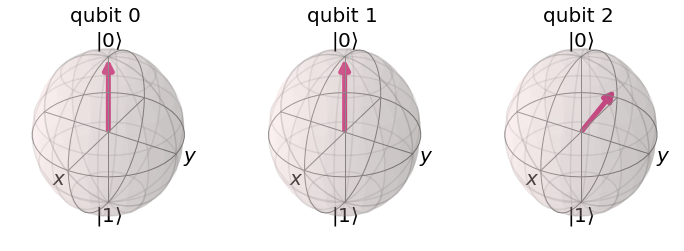

In [20]:
backend = BasicAer.get_backend('statevector_simulator')
out_vector = execute(qc, backend).result().get_statevector()
plot_bloch_multivector(out_vector)

Using the QASM Simulator

In [17]:
inverse_init_gate = init_gate.gates_to_uncompute() 

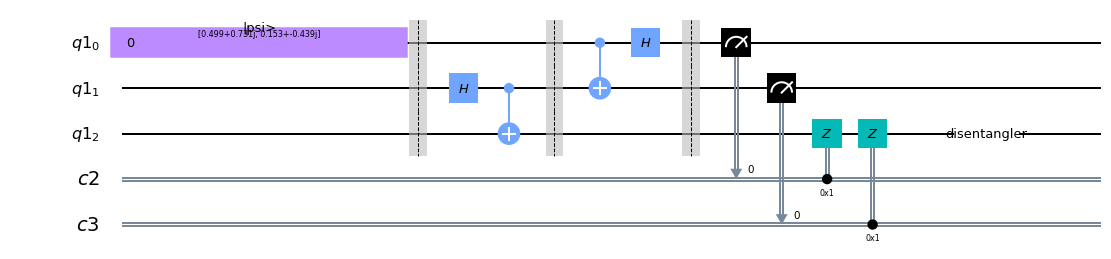

In [18]:
qc.append(inverse_init_gate,[2])
qc.draw()

Finally, we measure to the third classical bit to see our output:

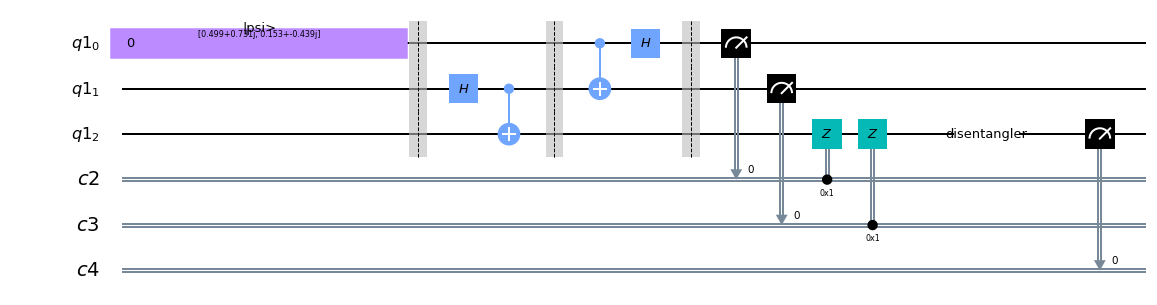

In [19]:
cr_result  = ClassicalRegister(1)
qc.add_register(cr_result)
qc.measure(2,2)
qc.draw()

and We run our experiment 

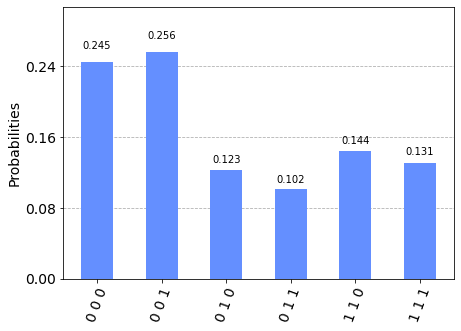

In [20]:
backend = BasicAer.get_backend('qasm_simulator')
counts = execute(qc, backend , shots = 1024 ).result().get_counts()
plot_histogram(counts)